## 1. Segmentation
Segmentation은 컴퓨터 비전에서 이미지나 영상을 픽셀 단위로 분할하여 각 영역이 무엇을 나타내는지 구분하는 기술입니다. 이는 크게 Semantic Segmentation과 Instance Segmentation으로 나뉘는데, Semantic Segmentation은 같은 종류의 객체를 동일한 클래스로 분류하는 반면, Instance Segmentation은 같은 클래스 내에서도 개별 객체를 구분합니다. 이를 통해 의료 영상 분석, 자율주행, 위성 이미지 처리 등 다양한 분야에서 정밀한 객체 인식을 수행할 수 있습니다. Segmentation 모델로는 U-Net, DeepLab, Mask R-CNN 등이 널리 사용됩니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FbUla0i%2FbtsMEoFBBFg%2FAAAAAAAAAAAAAAAAAAAAANsTt4jCSTsz_hIMnLIvRyfxueUeIt8B9HAc77CCnSYm%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3D9uWb%252B0cOXOPhv7SH5psPKo9bIKA%253D">


## 2. 스타벅스 데이터셋

In [1]:
!pip install -q ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.2 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.9/112.6 GB disk)


In [3]:
import os
import random
import shutil
import ultralytics
import cv2
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from pycocotools import mask as maskUtils
from torchvision import transforms

In [4]:
!unzip -q starbucks.zip

In [5]:
# zip파일 안에 폴더 없을때
# !mkdir /content/starbucks

# !unzip -q starbucks.zip -d /content/starbucks

In [6]:
data_root = "/content/starbucks"

In [7]:
data_list = glob.glob(f'{data_root}/*.jpg') + glob.glob(f'{data_root}/*.jpeg')
data_list

['/content/starbucks/starbucks28.jpg',
 '/content/starbucks/starbucks14.jpg',
 '/content/starbucks/starbucks22.jpg',
 '/content/starbucks/starbucks39.jpg',
 '/content/starbucks/starbucks38.jpg',
 '/content/starbucks/starbucks36.jpg',
 '/content/starbucks/starbucks33.jpg',
 '/content/starbucks/starbucks37.jpg',
 '/content/starbucks/starbucks20.jpg',
 '/content/starbucks/starbucks34.jpg',
 '/content/starbucks/starbucks15.jpg',
 '/content/starbucks/starbucks23.jpg',
 '/content/starbucks/starbucks26.jpg',
 '/content/starbucks/starbucks29.jpg',
 '/content/starbucks/starbucks19.jpg',
 '/content/starbucks/starbucks21.jpg',
 '/content/starbucks/starbucks13.jpg',
 '/content/starbucks/starbucks32.jpg',
 '/content/starbucks/starbucks40.jpg',
 '/content/starbucks/starbucks12.jpg',
 '/content/starbucks/starbucks11.jpg',
 '/content/starbucks/starbucks30.jpg',
 '/content/starbucks/starbucks35.jpg',
 '/content/starbucks/starbucks31.jpg',
 '/content/starbucks/starbucks18.jpg',
 '/content/starbucks/star

In [8]:
# COCO JSON 파일 로드
def load_coco_annotations(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data

In [9]:
load_coco_annotations(f'{data_root}/instances_default.json')

{'licenses': [{'name': '', 'id': 0, 'url': ''}],
 'info': {'contributor': '',
  'date_created': '',
  'description': '',
  'url': '',
  'version': '',
  'year': ''},
 'categories': [{'id': 1, 'name': 'logo', 'supercategory': ''},
  {'id': 2, 'name': 'text', 'supercategory': ''}],
 'images': [{'id': 1,
   'width': 236,
   'height': 214,
   'file_name': 'starbucks11.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 2,
   'width': 201,
   'height': 251,
   'file_name': 'starbucks12.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 3,
   'width': 395,
   'height': 128,
   'file_name': 'starbucks13.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 4,
   'width': 301,
   'height': 167,
   'file_name': 'starbucks14.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 5,
   'width': 275,
   'height': 183,
   'file_n

In [10]:
# 이미지 파일 불러오기
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f'이미지를 찾을 수 없음: {image_path}')
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

array([[[100,  81,  64],
        [ 97,  76,  57],
        [103,  76,  55],
        ...,
        [177, 144, 135],
        [177, 144, 135],
        [177, 144, 135]],

       [[ 99,  73,  58],
        [ 92,  63,  49],
        [ 97,  64,  49],
        ...,
        [182, 146, 130],
        [182, 146, 130],
        [182, 146, 130]],

       [[130,  93,  75],
        [117,  78,  61],
        [122,  78,  65],
        ...,
        [189, 157, 136],
        [189, 157, 136],
        [189, 157, 136]],

       ...,

       [[160,  72,  32],
        [134,  47,   4],
        [143,  55,   7],
        ...,
        [ 66,  45,  42],
        [ 66,  45,  42],
        [ 66,  45,  42]],

       [[211,  99,  17],
        [211, 101,   4],
        [211, 103,   0],
        ...,
        [ 59,  42,  50],
        [ 59,  42,  50],
        [ 59,  42,  50]],

       [[222, 110,  24],
        [222, 112,  14],
        [222, 115,   1],
        ...,
        [ 59,  42,  50],
        [ 59,  42,  50],
        [ 59,  42,  50]]], dtype=uint8)
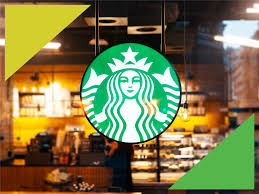

In [11]:
load_image(data_list[2])

In [12]:
def draw_annotations(image, annotations, image_id):
    for ann in annotations:
        if ann['image_id'] == image_id and 'segmentation' in ann:
            segmentation = ann['segmentation']
            for seg in segmentation:
                if isinstance(seg, list) and len(seg) >= 6:
                    points = np.array(seg).reshape(-1,2).astype(np.int32)
                    cv2.polylines(image, [points], isClosed=True, color=(0,255,0),thickness=2)
    return image

In [13]:
# 메인 실행 함수
def visualize_coco(json_path, image_folder, image_id):
    coco_data = load_coco_annotations(json_path)
    image_info = next((img for img in coco_data['images'] if img['id'] == image_id), None)
    if not image_info:
        raise ValueError(f'Image ID {image_id} not found in COCO JSON file')

    image_path = os.path.join(image_folder, image_info['file_name'])
    image = load_image(image_path)
    annotated_image = draw_annotations(image, coco_data['annotations'], image_id)

    plt.figure(figsize=(8, 6))
    plt.imshow(annotated_image)
    plt.axis('off')
    plt.title(f'Image ID: {image_id} with Annotations')
    plt.show()

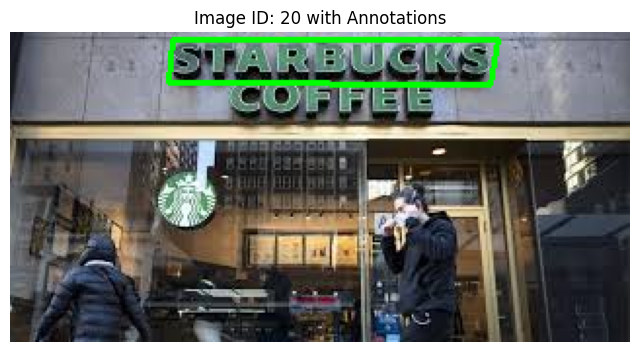

In [14]:
visualize_coco(f'{data_root}/instances_default.json', f'{data_root}', 20)

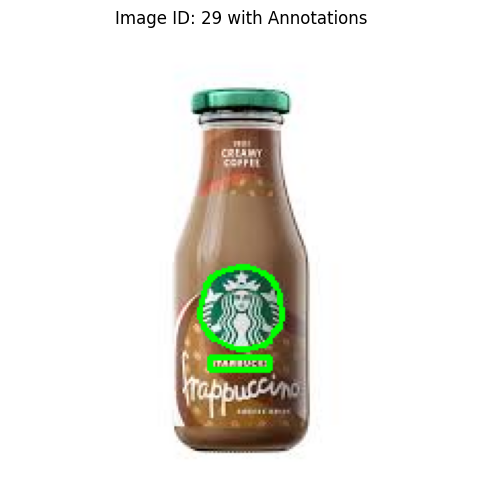

In [15]:
visualize_coco(f'{data_root}/instances_default.json', f'{data_root}', 29)

In [16]:
coco_json_path = f'{data_root}/instances_default.json'
yolo_output_folder = f'{data_root}'
image_folder = f'{data_root}'

with open(coco_json_path, 'r') as f:
    coco_data = json.load(f)    # 딕셔너리로 사용할 예정

image_dict = {img['id']: img for img in coco_data['images']}
image_dict

{1: {'id': 1,
  'width': 236,
  'height': 214,
  'file_name': 'starbucks11.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 2: {'id': 2,
  'width': 201,
  'height': 251,
  'file_name': 'starbucks12.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 3: {'id': 3,
  'width': 395,
  'height': 128,
  'file_name': 'starbucks13.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 4: {'id': 4,
  'width': 301,
  'height': 167,
  'file_name': 'starbucks14.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 5: {'id': 5,
  'width': 275,
  'height': 183,
  'file_name': 'starbucks15.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 6: {'id': 6,
  'width': 299,
  'height': 168,
  'file_name': 'starbucks16.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 7: {'id': 7,
  'width': 275,
  'height': 183,
  'fi

In [41]:
for ann in coco_data['annotations']:
    image_id = ann['image_id']
    # yolo는 0부터 시작임
    category_id = ann['category_id'] - 1
    segmentation = ann['segmentation']

    image_info = image_dict.get(image_id)
    if not image_info:
        continue

    img_width,img_height = image_info['width'],image_info['height']
    # os.path.splitext : 파일 경로에서 확장자를 분리
    yolo_label_path = os.path.join(yolo_output_folder, f"{os.path.splitext(image_info['file_name'])[0]}.txt")

    yolo_lines = []

    for seg in segmentation:
        if isinstance(seg, list) and len(seg) >= 6:
            normalized_points = [
                # 중앙좌표 뽑기 위해 전체 개수만큼 돌지만 짝수 인덱스만 순환시켜서 x좌표만 구하고 그 뒤는 자동 계산
                (seg[i]/img_width, seg[i+1]/img_height) for i in range(0,len(seg),2)
            ]
            yolo_line = f'{category_id} ' + ' '.join([f'{x:.6f} {y:6f}' for x,y in normalized_points])
            yolo_lines.append(yolo_line)

    if yolo_lines:
        with open(yolo_label_path,'w') as f:
            f.write('\n'.join(yolo_lines))
print('coco -> yolo  변환완료')

coco -> yolo  변환완료


In [42]:
random.seed(2025)

data_list = glob.glob(f'{data_root}/*jpg') + glob.glob(f'{data_root}/*jpeg')
random.shuffle(data_list)
test_ratio = 0.2
num_data = len(data_list)
num_data

30

In [43]:
test_list = data_list[:int(num_data*test_ratio)]
valid_list = data_list[int(num_data*test_ratio):int(num_data*test_ratio)*2]
train_list = data_list[int(num_data*test_ratio)*2:]

len(test_list), len(valid_list), len(train_list)

(6, 6, 18)

In [44]:
from genericpath import exists
file_root = f'{data_root}'
train_root = f'{data_root}/train'
valid_root = f'{data_root}/valid'
test_root = f'{data_root}/test'

for folder in [train_root, valid_root, test_root]:
    if not os.path.exists(folder):
        os.makedirs(folder)

In [45]:
def copy_files(file_list,dest_folder):
    for file_path in file_list:
        file_name = os.path.basename(file_path)
        file_base, ext = os.path.splitext(file_name)

        # 원본(이미지) 파일 복사
        dest_path = os.path.join(dest_folder,file_name)
        shutil.copy(file_path,dest_path)

        # 텍스트 파일 복사
        txt_file_path = os.path.join(os.path.dirname(file_path),f'{file_base}.txt')
        if os.path.exists(txt_file_path):
            dest_txt_path = os.path.join(dest_folder,f'{file_base}.txt')
            shutil.copy(txt_file_path,dest_txt_path )

In [46]:
copy_files(train_list, train_root)
copy_files(valid_list, valid_root)
copy_files(test_list, test_root)

In [47]:
train_root = f'{data_root}/train'
valid_root = f'{data_root}/valid'
test_root = f'{data_root}/test'

In [48]:
import yaml

In [49]:
data = dict()
data['train'] = train_root
data['val'] = valid_root
data['test'] = test_root
data['nc'] = 2
data['names'] = ['logo','text']

with open(f'./starbucks/starbucks.yaml', 'w') as f:
    yaml.dump(data,f)

In [50]:
from ultralytics import YOLO

In [51]:
model = YOLO('yolov8s-seg.pt')

In [52]:
results = model.train(
    data='./starbucks/starbucks.yaml',
    epochs=10,
    batch=4,
    imgsz=224,
    device=0,
    workers=2,
    amp=False,
    name='starbucks_s'
)

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./starbucks/starbucks.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=starbucks_s8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

train: Scanning /content/starbucks/train... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 2389.39it/s]

train: New cache created: /content/starbucks/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 258.8±138.4 MB/s, size: 9.3 KB)


val: Scanning /content/starbucks/valid... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 911.81it/s]

val: New cache created: /content/starbucks/valid.cache


Plotting labels to runs/segment/starbucks_s8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/segment/starbucks_s8
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.672G      2.496      3.717      4.497      1.977          2        224: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all          6          6      0.746        0.2       0.19      0.167      0.746        0.2       0.19      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.727G      1.163      1.946      2.036      1.163          2        224: 100%|██████████| 5/5 [00:00<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.31it/s]

                   all          6          6      0.661        0.3      0.288      0.233      0.661        0.3      0.284      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.766G     0.8728      1.455      2.194      1.024          2        224: 100%|██████████| 5/5 [00:00<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.67it/s]

                   all          6          6      0.671        0.3      0.288      0.247      0.671        0.3      0.287      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.805G      1.095      1.781      1.483      1.077          2        224: 100%|██████████| 5/5 [00:00<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]

                   all          6          6      0.247      0.197      0.151      0.118      0.247      0.197      0.151      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      0.92G      1.053      1.532      1.976      1.039          2        224: 100%|██████████| 5/5 [00:00<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.78it/s]

                   all          6          6      0.117        0.4      0.134     0.0957      0.117        0.4      0.134     0.0902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.961G      1.106      1.719      1.886      1.116          2        224: 100%|██████████| 5/5 [00:00<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.43it/s]

                   all          6          6      0.341        0.3      0.234      0.196      0.341        0.3      0.234      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10         1G      1.017      1.399      1.752      1.085          2        224: 100%|██████████| 5/5 [00:00<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]

                   all          6          6      0.178        0.4      0.281      0.223      0.178        0.4      0.281      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.17G      1.114      1.417      1.358       1.02          2        224: 100%|██████████| 5/5 [00:00<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.75it/s]

                   all          6          6      0.178        0.4      0.281      0.223      0.178        0.4      0.281      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.21G     0.9684      1.193      1.429      1.081          2        224: 100%|██████████| 5/5 [00:00<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.25it/s]

                   all          6          6       0.28        0.4      0.328      0.259       0.28        0.4      0.328      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.25G      0.913       1.29      1.504     0.9286          2        224: 100%|██████████| 5/5 [00:00<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.02it/s]

                   all          6          6      0.308        0.5      0.352      0.288      0.308        0.5      0.352      0.267



10 epochs completed in 0.004 hours.
Optimizer stripped from runs/segment/starbucks_s8/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/starbucks_s8/weights/best.pt, 23.8MB

Validating runs/segment/starbucks_s8/weights/best.pt...
Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]


                   all          6          6      0.308        0.5      0.352      0.288      0.308        0.5      0.352      0.267
                  logo          5          5      0.615          1      0.703      0.576      0.615          1      0.703      0.534
                  text          1          1          0          0          0          0          0          0          0          0
Speed: 0.1ms preprocess, 4.0ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/segment/starbucks_s8


In [53]:
model = YOLO('runs/segment/starbucks_s/weights/best.pt')

results = model.predict(
    source='./starbucks/test',
    imgsz=224,
    conf=0.25,
    device=0,
    save=True,
    save_conf=True
)

FileNotFoundError: [Errno 2] No such file or directory: 'runs/segment/starbucks_s/weights/best.pt'